### Reference: <br>
Data science basics<br>
Doing Data Science<br>
By: Cathy O'Neil; Rachel Schutt<br>
Publisher: O'Reilly Media, Inc.<br>
Pub. Date: October 24, 2013<br>
Print ISBN-13: 978-1-4493-5865-5<br>
Chapter 3 <br>
http://proquest.safaribooksonline.com.proxy.lib.odu.edu/book/databases/9781449363871

### Logistic Regression

In linear regression the output variable can take any value, in logistic regression the output is bounded between $0$ and $1$, and can be directly interpreted as probabilities. We are interested in using the output value as a probaility of the input belonging to a class or not. For example, in the case of spam filter the output indicates the probability of a given email being spam. We can use these probabilities directly or use a threshold to decide whether the email is spam or not. For example, we can use a threshold of 0.8, and if the output value is greater than 0.8, we predict email to be spam. 

When we were developing the model for linear regression, we made an assumption that there is a linear relationship between input and output, where output can take any real value. For logistic regression, we are interested in functions where the ouput is bounded between $0$ and $1$. 

One such function is an inverse $logit$ that has an output bounded between $0$ and $1$. The inverse-logit takes input  values along the real line and output values in the range $[0,1]$. 

$logit^{-1}(z) = g(z) = \dfrac{1}{1+e^{-z}} =  \dfrac{e^z}{1 +e^{z}}$



In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

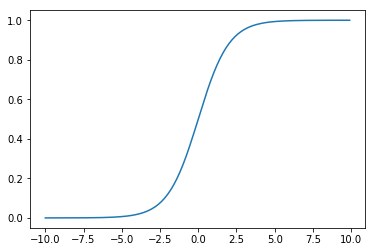

In [66]:
def g(z):
    return np.exp(z) / (1 + np.exp(z))

t1 = np.arange(-10.0, 10.0, 0.1)
plt.plot(t1, g(t1))
plt.show()

Note that value of $g(z)$ at $z=0$ is $0.5$; and for $z>0$ the function value $g(z)$ is greater than $0.5$.

In linear regression we were modeling the function to be learnt (hypothesis) as:

$h_{\beta}(x) = \mathbf{\beta}^T \mathbf{x}$, where $\mathbf{\beta}$ and $x$ are vectors of size $n$ (number of features).

In logistic regression, we modify the hypothesis function to be:

$h_{\beta}(x) = g(\mathbf{\beta}^T \mathbf{x}) = \dfrac{1}{1+e^{-\mathbf{\beta}^T \mathbf{x}}} $

Note that in the above equation $\mathbf{\beta}^T \mathbf{x}$ takes a real value from $-\infty$ and $+\infty$; and the function $g()$ maps that value between $0$ and $1$

The value of the function $h_{\beta}(x)$ for a given $x$ can be viewed as the probability of input, represented by its feature $x$, belongs to a class $y=1$:  $p(y=1|x;\beta)$.

Observe that for $\mathbf{\beta}^T \mathbf{x}=0$, the $p(y=1|x;\beta) = 0.5$. We typically would like to assign input to a class $y=1$ when $p(y=1|x;\beta) \geq 0.5$. This implies that for such an input the following condition is true:

$\mathbf{\beta}^T \mathbf{x} \geq 0$

Let us take an example where input consists of three features, and  we have already determined $\beta_0 = -3, \beta_1 = 1$ and $\beta_2 = 1$. In such a case all input where $-3 + x_1 + x_2  \geq 0$ (note that $x_0=1$) will be classified in class $y=1$, and $y=0$ otherwise. 



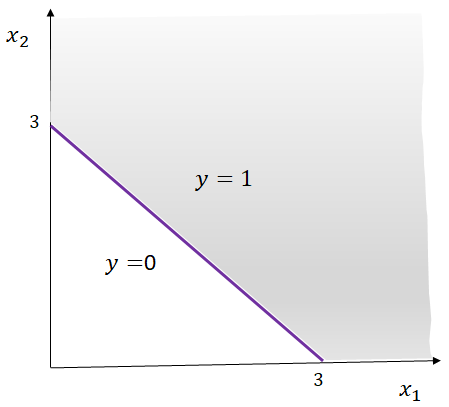

<a id='decision_boundary'></a>
In general, decision Line Boundary for $n=3$ is given by: 

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0.0$

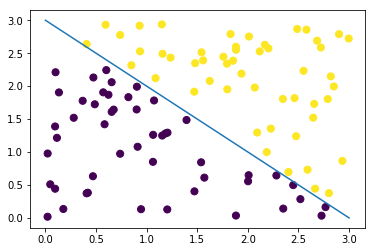

In [67]:
m = 100
X = np.random.rand(m,2)*3.0
#print (X)
y = np.empty(m, dtype=int)
for i in range(m):
    y[i] = 0
    if ((-3+X[i,0]+X[i,1]) > 0.0 ):
        y[i] = 1
#print(y)
plt.scatter(X[:,0], X[:,1], c=y, s=50) 
plt.plot([0,3],[3,0])
plt.show()

###  Cost Function and Optimization

A training set of $m$ samples consists of:

$\{ (x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),(x^{(3)},y^{(3)}), \ldots , (x^{(m)},y^{(m)}) \}$

A training sample consists of a  $x$ component, which is a vector of size $n$:

$$x \in 
\begin{bmatrix}
    x_0  \\    
    x_1 \\ 
    x_2 \\    
    \vdots \\
    x_n 
\end{bmatrix}
$$

Note that $x_0 =1 $. The $y$ component of a sample has a value $0$ or $1$. 

The function we want to learn using the training set is:

$h_{\beta}(x) = \dfrac{1}{1+e^{-\mathbf{\beta}^T \mathbf{x}}} $

The learning process implies estimating the parameter values based on the training set. 

#### Cost Function
In linear regression the cost function is defined as (to keep notation simple we drop $\beta$ from $h_{\beta}(x)$)

$J(\beta) = \dfrac{1}{2}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2$ 

The objective of defining a cost function is to find $\mathbf{\beta}$ that minimizee the cost. For logistic regression, we can also define the same cost function. However, optimization of the cost function to find $\mathbf{\beta}$ becomes challenging in the case of logistic regression. This is because the function 

$h(x) = \dfrac{1}{1+e^{-\mathbf{\beta}^T \mathbf{x}}} $ 


is a non-linear function resulting in a non-convex function. Observe that in the case of a linear regression $h(x) = \mathbf{\beta}^T \mathbf{x}$ is a linear function. 

#### New cost function for logistic regression that is easy to optimize

$J(\beta) = \sum_{i=1}^m -y^{(i)} \log h(x^{(i)}) - (1-y^{(i)}) \log (1-h(x^{(i)}))  $, where $y^{(i)} \in \{0,1\}$

To understand the justification of such a cost function, let us first look at the cost for a single training sample:

$-y^{(i)} \log h(x^{(i)}) - (1-y^{(i)}) \log (1-h(x^{(i)}))  $

Now consider the two cases separately $y^{(i)} = 1$ and $y^{(i)}=0$.

For $y^{(i)} = 1$ the cost becomes:

$-\log h(x^{(i)})$ 

Observe that $h(x^{(i)})$ is bounded between $0$ and $1$


Exercise: Plot the cost function $-\log h(x^{(i)})$ for different values of $h(x^{(i)})$ (for this you can use hx = np.arange(0.01, 1.0, 0.01))

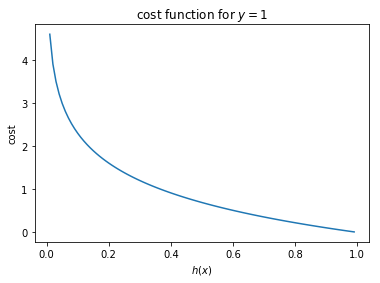

In [68]:
# Partial Solution
def cost(hx):
    return -np.log(hx)

hx = np.arange(0.01, 1.0, 0.01)
plt.plot(hx, cost(hx))
plt.xlabel('$h(x)$')
plt.ylabel('cost')
plt.title('cost function for $y=1$')
plt.show()

Observe that when $h(x)$ is close to $1$, it is closer to the true value ($y=1$) of the training sample, and hence a cost value close to zero make sense. On the other hand when  $h(x)$ is close to $0$ it is far away from the true value ($y=1$) of the training sample, and hence a very large cost value make sense. 

For $y^{(i)} = 0$ the cost becomes:

$-\log (1-h(x^{(i)}))$


Exercise: Plot the cost function $-\log (1-h(x^{(i)}))$ for different values of $h(x^{(i)})$

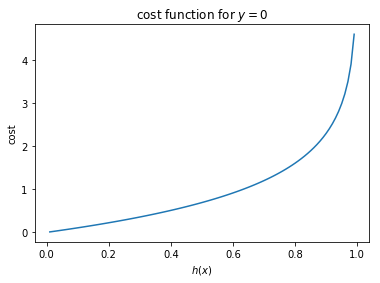

In [69]:
def cost(hx):
    return -np.log(1-hx)

hx = np.arange(0.01, 1.0, 0.01)
plt.plot(hx, cost(hx))
plt.xlabel('$h(x)$')
plt.ylabel('cost')
plt.title('cost function for $y=0$')
plt.show()

Observe that when $h(x)$ is close to $0$, it is closer to the true value ($y=0$) of the training sample, and hence a cost value close to zero make sense. On the other hand when  $h(x)$ is close to $1$ it is far away from the true value ($y=0$) of the training sample, and hence a very large cost value make sense. 

#### Gradient Descent

$J(\beta) = \sum_{i=1}^m -y^{(i)} \log h(x^{(i)}) - (1-y^{(i)}) \log (1-h(x^{(i)}))  $

Objective: Fine $\beta$'s that minimizes the cost function $J(\beta)$

Gradient descent algorithm starts with some initial $\beta_j$'s, and repeatedly update them:

$\beta_j := \beta_j - \alpha\dfrac{\partial}{\partial \beta_j} J(\beta)$

In our example dataset $X$ we are updating three parameters $\beta_0$, $\beta_1$, and $\beta_2$ at each time step. The $\alpha$ is called learning rate. This algorithm basically takes a step in the direction of steepest decrease of $J$ for updating $\beta_j$'s.

We need the partial derivative, that is the direction of steepest decrease. This is exactly what we had for linear regression.

$\dfrac{\partial}{\partial \beta_j} J(\beta) = \sum_{i=1}^m (h(x^{(i)})-y^{(i)})x_{j}^{(i)}$

This gives

$\beta_j := \beta_j - \alpha\sum_{i=1}^m (h(x^{(i)})-y^{(i)})x_{j}^{(i)}$


Let us compute $\beta$s for the $(X, y)$ data generated earlier as part of the decision boundary discussion.

In [70]:
# identify number of observations
m = X.shape[0]
# create design matrix
Xt = np.array([np.ones(m), X[:,0], X[:,1]]).T

In [71]:
print (np.shape(Xt), np.shape(y))
print (Xt[0:5])
print (y[0:5])

(100, 3) (100,)
[[ 1.          2.65492604  1.73076115]
 [ 1.          2.76719169  0.16469068]
 [ 1.          2.93398105  0.86591227]
 [ 1.          2.68391211  2.68974943]
 [ 1.          1.79332671  2.34080773]]
[1 0 1 1 1]


In [72]:
# sigmoid function
def g(z):
    return np.exp(z) / (1 + np.exp(z))


In [73]:
# compute slope using graident - similar to linear regression except h(x) computation
def slope(b0, b1, b2,  X, y):
    sumv0 = 0.0
    sumv1 = 0.0
    sumv2 = 0.0
    for i in range(len(X)):
        bx = b0*X[i,0] + b1*X[i,1] + b2*X[i,2]
        hx = g(bx) 
        sumv0 = sumv0 + (hx - y[i])*X[i,0]
        sumv1 = sumv1 + (hx - y[i])*X[i,1]
        sumv2 = sumv2 + (hx - y[i])*X[i,2]
    return sumv0, sumv1, sumv2

In [74]:
alpha = 5e-4
num_steps = 50000
b0 = 0.0
b1 = 0.0
b2 = 0.0
for k in range(num_steps):
    sum0, sum1, sum2 = slope(b0, b1, b2,  Xt, y)
    b0 = b0 - alpha*sum0
    b1 = b1 - alpha*sum1
    b2 = b2 - alpha*sum2
print (b0, b1, b2) 

-20.2738249061 6.61809661987 6.81049657789


Exercise: Use the computed $\beta$s to plot the decision boundary. For this exercise you will use the decision boundary line equation. The partial solution is given below. You need to complete the expression of $d1$ and $d2$>

[Link to the decision boundary line equation](#decision_boundary)

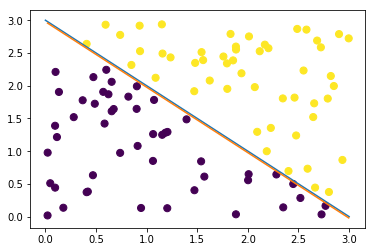

In [75]:
# Partial Solution
# Original Plot
plt.scatter(X[:,0], X[:,1], c=y, s=50) 
plt.plot([0,3],[3,0]) # original decision boundary
# compute line for new decision boundary points using two points (c1,d1) and (c2,d2)
# use c1 as min X[:,0]  and c2 as max X[:,0]
c1 = np.min(X[:,0])
c2 = np.max(X[:,0])
# use decision boundary line equation to compute corresponding d1 and d2
d1 = -(b0/b2+b1/b2*c1)
d2 = -(b0/b1+b2/b1*c2)
plt.plot([c1,c2],[d1,d2])
plt.show()

Exercise: Use the estimated parameters compute the $p(y=1|x, \beta)$  for input $x1 = 1.0$ and $x2 = 1.0$, and classify the input point. Repeat the exercise for input $x1 = 1.5$ and $x2 = 1.5$

In [76]:
bx=b0+b1*1+b2*1
hx=g(bx)
print(bx)
print('p(y=1|x;beta) =',hx)
if(hx<=0.5):
    label=0
else:
    label=1
    
print(label)


-6.84523170831
p(y=1|x;beta) = 0.00106338755322
0


In [77]:
bx=b0+b1*1.5+b2*1.5
hx=g(bx)
print(bx)
print('p(y=1|x;beta) =',hx)
if(hx<=0.5):
    label=0
else:
    label=1
    
print(label)


-0.130935109434
p(y=1|x;beta) = 0.46731290827
0


Make code faster by replacing scalar operation by numpy array operation where possible

In [78]:
def logistic_regression(X, y, num_steps, learning_rate):
    betas = np.zeros(X.shape[1])
    for step in range(num_steps):
        bx = np.dot(X, betas)
        hx = g(bx)
        err = hx - y
        grad = np.dot(X.T, err)
        betas -= learning_rate * grad
    return betas

In [79]:
betas = logistic_regression(Xt, y, num_steps = 50000, learning_rate = 5e-4)
print (betas)

[-20.27382491   6.61809662   6.81049658]


Exercise: We will like to remove points in $X$ that are close to the decision boundary line.  Note that points on the decision boundary line satisfy:

$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0.0$

We will like to remove all points which satisfy the following condition:


$|\beta_0 + \beta_1 x_1 + \beta_2 x_2| \leq 1.0$


and plot again. Hint: Use numpy conditional mask. 

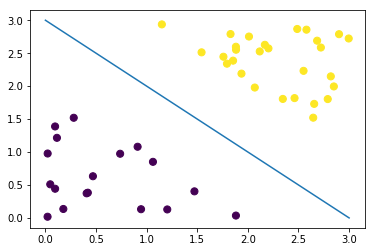

In [84]:
T=-3 + X[:,0] + X[:,1]
XF=X[abs(T)>1]
yf=y[abs(T)>1]

plt.scatter(XF[:,0],XF[:,1],c=yf,s=50)
plt.plot([0,3],[3,0])
plt.show()

Exercise: Perform logistic regression using the function "logistic_regression" on the filtered data set $XF$ and $yf$.

In [85]:
# identify number of observations
m = XF.shape[0]
# create design matrix
XFt = np.array([np.ones(m), XF[:,0], XF[:,1]]).T
betas = logistic_regression(XFt, yt, num_steps = 50000, learning_rate = 5e-4)
print (betas)

[-10.37303806   3.3572447    3.9577643 ]


Exercise: Use the estimated parameters to plot the decision boundary plot along with the original decision boundary.

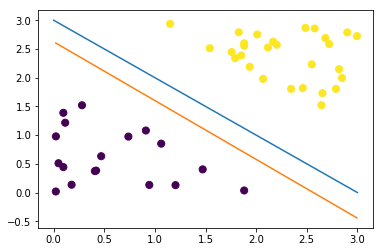

In [86]:
# Partial Solution
b0 = betas[0]
b1 = betas[1]
b2 = betas[2]
plt.scatter(XF[:,0], XF[:,1], c=yf, s=50) 
plt.plot([0,3],[3,0]) # original decision boundary
# compute line for new decision boundary points using two points (c1,d1) and (c2,d2)
# use c1 as min X[:,0]  and c2 as max X[:,0]
c1 = np.min(X[:,0])
c2 = np.max(X[:,0])

# use decision boundary line equation to compute corresponding d1 and d2
d1 = -(b0/b2+b1/b2*c1)
d2 = -(b0/b1+b2/b1*c2) 
plt.plot([c1,c2],[d1,d2])
plt.show()

###  Higher Degree Polynomials

We are interested in a feature set like this:

$$x \in 
\begin{bmatrix}
    x_0  \\    
    x_1^2 \\
    x_2^2 
\end{bmatrix}
$$

We will generate random data with model parameters as:

$$\mathbf{\beta} \in 
\begin{bmatrix}
    -4  \\    
    1 \\
    1 
\end{bmatrix}
$$

In [87]:
import matplotlib.patches as patches

In [88]:
m = 100
X = np.random.uniform(-2.5, 2.5, (m,2))
X[0:5]

array([[-2.37822041,  0.92504713],
       [-1.52124529,  2.21379285],
       [ 2.13283184,  1.23731939],
       [ 1.64447876, -0.26821048],
       [-1.5739689 ,  1.29732772]])

In [89]:
Xt = np.array([np.ones(m), X[:,0]*X[:,0], X[:,1]*X[:,1]]).T
print (Xt[0:5])

[[ 1.          5.65593231  0.8557122 ]
 [ 1.          2.31418723  4.90087877]
 [ 1.          4.54897167  1.53095928]
 [ 1.          2.70431038  0.07193686]
 [ 1.          2.47737811  1.68305921]]


In [90]:
#print (X)
y = np.empty(m, dtype=int)
for i in range(m):
    y[i] = 0
    if ((Xt[i,1]+Xt[i,2]) > 4.0 ):
        y[i] = 1
print(y)

[1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1]


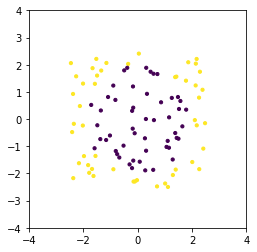

In [91]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111, aspect='equal')
ax1.axis([-4, 4, -4, 4])
ax1.scatter(X[:,0], X[:,1], c=y, s=10) 

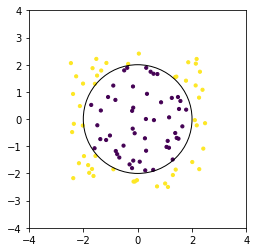

In [92]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111, aspect='equal')
ax1.axis([-4, 4, -4, 4])
ax1.add_patch(
    patches.Circle(
        (0.0, 0.0),   # (x,y)
        2, fill=False          # radius
    )
)
ax1.scatter(X[:,0], X[:,1], c=y, s=10) 

In [93]:
betas = logistic_regression(Xt, y, num_steps = 50000, learning_rate = 5e-4)
print (betas)

[-17.85665455   4.81156905   4.32611743]


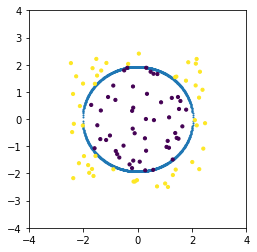

In [94]:
x1 = np.linspace(-2.5, 2.5, 1000)
x2sq = (-betas[0] - betas[2]*x1*x1)/betas[1]

x2sqf = x2sq[x2sq >= 0]
x2f = np.sqrt(x2sqf)
x1f = x1[x2sq >= 0]
x1f = np.append(x1f, x1f)
x2f = np.append(x2f, -x2f)

fig1 = plt.figure()

ax1 = fig1.add_subplot(111, aspect='equal')
ax1.axis([-4, 4, -4, 4])
ax1.scatter(x1f, x2f, s=1) 
ax1.scatter(X[:,0], X[:,1], c=y, s=10) 

#### Multi Class Logistic Regression

One simple way is to do multiple two-class classifications. Let us say we have four classes: $c_1$, $c_2$, $c_3$, and $c_4$. We build four regression one for each class. A new sample is classified by computing probability of being in a class using all the four models, and assigning it a class with the highest probability.

### Logistic  Regression using Scikit Package



In [95]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]


logistic = linear_model.LogisticRegression()
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

# Compare it with KNN
knn = neighbors.KNeighborsClassifier()
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.938889
KNN score: 0.961111


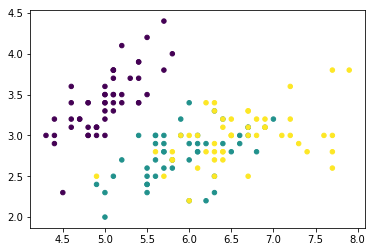

In [96]:
iris = datasets.load_iris()
XI = iris.data[:, :2]  # we only take the first two features.
yi = iris.target
n_samples = len(XI)
plt.scatter(XI[:,0], XI[:,1], c=yi, s=20) 

In [97]:
X_train = XI[:int(.9 * n_samples)]
y_train = yi[:int(.9 * n_samples)]
X_test = XI[int(.9 * n_samples):]
y_test = yi[int(.9 * n_samples):]
n_samples

150

In [98]:
#logistic = linear_model.LogisticRegression()
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
yh = logistic.predict(X_test)
print (yh)
print (y_test)

[2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
XI, yi, test_size=0.1, random_state=42)

In [101]:
#logistic = linear_model.LogisticRegression()
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
yh = logistic.predict(X_test)
print (yh)
print (y_test)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
